# Word embeddings

*This activity has been inspired from the [Word embeddings demo](https://gist.github.com/fgiobergia/b3a20e097f9b697d0a02fb17685cfd5a) by Flavio Giobergia*

For this example, we will use the `gensim` library to manipulate word embeddings. 

In [82]:
from gensim.models import KeyedVectors
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

Download pre-trained word embedding vector from the [fastText](https://fasttext.cc/) website:

The file contains 1 million word vectors train on Wikipedia 2017, UMBC corpus and statmt.org news dataset. Be carefull, the file is large (about 650 MB).

In [ ]:
!wget -N https://dl.fbaipublicfiles.com/fasttext/vectors-english/wiki-news-300d-1M.vec.zip
!unzip -f wiki-news-300d-1M.vec.zip

--2025-05-26 00:21:36--  https://dl.fbaipublicfiles.com/fasttext/vectors-english/wiki-news-300d-1M.vec.zip
Résolution de dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)… 2600:9000:2117:bc00:13:6e38:acc0:93a1, 2600:9000:2117:d400:13:6e38:acc0:93a1, 2600:9000:2117:e200:13:6e38:acc0:93a1, ...
Connexion à dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|2600:9000:2117:bc00:13:6e38:acc0:93a1|:443… connecté.
requête HTTP transmise, en attente de la réponse… 200 OK
Taille : 681808098 (650M) [application/zip]
Enregistre : ‘wiki-news-300d-1M.vec.zip.4’

wiki-news-300d-1M.v 100%[===================>] 650,22M   105MB/s    ds 6,4s    

2025-05-26 00:21:43 (102 MB/s) - ‘wiki-news-300d-1M.vec.zip.4’ enregistré [681808098/681808098]

Archive:  wiki-news-300d-1M.vec.zip


Load the model into memory. This may take a while (about 4-5 min).

In [74]:
word_vectors = KeyedVectors.load_word2vec_format("wiki-news-300d-1M.vec", binary=False)



Print vocabulary size (number of words known by the model) and the first 10 words in the vocabulary:

In [108]:
print(f"Vocabulary size: {len(word_vectors.index_to_key)}")
print("Ten first words:")
for word in word_vectors.index_to_key[:10]:
    print(word)

Vocabulary size: 400000
Ten first words:
the
,
.
of
to
and
in
a
"
's


Here a *word* is an usual word like `the`, `and`... but also punctuation marks like `,`, `.` or `"`.

In [109]:
def print_word_info(word: str) -> None:
    try:
        vector = word_vectors.get_vector(word)
        print(f"Vector for the '{word}': {vector[:5]}...")
        print(f"Vector length: {len(vector)}")
    except KeyError:
        print(f"'{word}' not found in vocabulary.")

Print vector size and first coordinates for a couple of words:

In [110]:
print_word_info("simulation")
print_word_info("science")
print_word_info("material")

Vector for the 'simulation': [-0.51781   0.069206 -0.092875  0.44081  -0.57836 ]...
Vector length: 100
Vector for the 'science': [-0.13322  0.48858  0.18867  0.33791  0.54542]...
Vector length: 100
Vector for the 'material': [-0.37457  0.73467  0.56799 -0.53387  0.30161]...
Vector length: 100


Unfortunately, all words are not in the vocabulary:

In [111]:
print_word_info("CECAM")


'CECAM' not found in vocabulary.


For a given word, the `similar_by_word()` method returns the most similar words in the vocabulary, together with their similarity score:

In [112]:
word_vectors.similar_by_vector(word_vectors.get_vector("simulation"), topn=10)

[('simulation', 1.0),
 ('simulations', 0.8206844329833984),
 ('simulator', 0.7404708862304688),
 ('modeling', 0.7228801846504211),
 ('visualization', 0.7066413760185242),
 ('real-time', 0.6895408630371094),
 ('modelling', 0.6483812928199768),
 ('algorithms', 0.6401902437210083),
 ('computing', 0.6401691436767578),
 ('simulated', 0.6365459561347961)]

In [113]:
word_vectors.similar_by_vector(word_vectors.get_vector("learning"), topn=10)

[('learning', 1.0000001192092896),
 ('teaching', 0.7720069289207458),
 ('knowledge', 0.76064133644104),
 ('experience', 0.7378624081611633),
 ('skills', 0.734375),
 ('learn', 0.7340658903121948),
 ('understanding', 0.699902355670929),
 ('education', 0.6989467740058899),
 ('educational', 0.6864885687828064),
 ('lessons', 0.681064784526825)]

In [114]:
target = word_vectors.get_vector("king") - word_vectors.get_vector("man") + word_vectors.get_vector("woman")
word_vectors.similar_by_vector(target, topn=10)

[('king', 0.8551837205886841),
 ('queen', 0.783441424369812),
 ('monarch', 0.6933802366256714),
 ('throne', 0.6833109855651855),
 ('daughter', 0.6809081435203552),
 ('prince', 0.6713141798973083),
 ('princess', 0.664408266544342),
 ('mother', 0.6579325795173645),
 ('elizabeth', 0.6563301086425781),
 ('father', 0.6392418742179871)]

In [115]:
countries = ["norway", "germany", "france", "italy", "greece", "portugal"]
capitals  = ["oslo", "berlin",  "paris",  "rome",  "athens", "lisbon"]

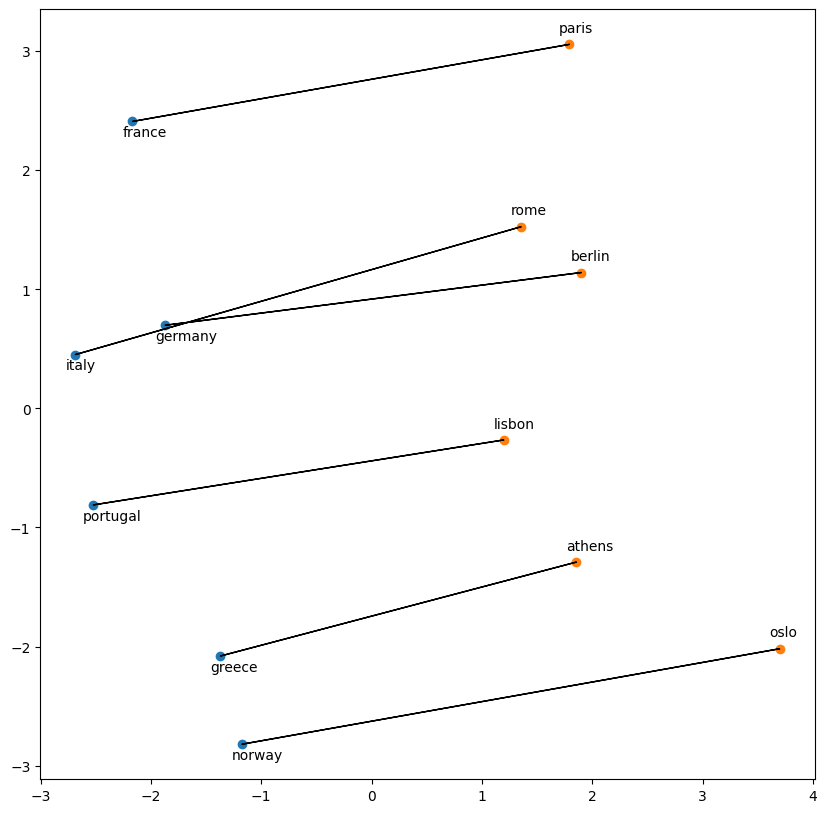

In [116]:
def plot_pairs(wv, word_list_1, word_list_2):
    wv_1 = [ wv.get_vector(word) for word in word_list_1 ]
    wv_2 = [ wv.get_vector(word) for word in word_list_2 ]
    
    pca = PCA(2)
    wv_pca = pca.fit_transform(wv_1 + wv_2)
    
    wv_pca_1 = wv_pca[:len(wv_1)]
    wv_pca_2 = wv_pca[len(wv_1):]
    
    plt.figure(figsize=(10,10))
    plt.scatter(wv_pca_1[:,0], wv_pca_1[:,1])
    plt.scatter(wv_pca_2[:,0], wv_pca_2[:,1])
    
    for i, (word_1, word_2) in enumerate(zip(word_list_1, word_list_2)):
        plt.annotate(word_1, wv_pca_1[i], xytext=(-10,-15), textcoords="offset pixels")
        plt.annotate(word_2, wv_pca_2[i], xytext=(-10,12), textcoords="offset pixels")
        
    for i in range(len(wv_pca_1)):
        plt.arrow(wv_pca_1[i,0], wv_pca_1[i,1], wv_pca_2[i,0]-wv_pca_1[i,0], wv_pca_2[i,1]-wv_pca_1[i,1], shape="left")

plot_pairs(word_vectors, countries, capitals)

In [99]:
import gensim.downloader

In [107]:
word_vectors = gensim.downloader.load("glove-wiki-gigaword-100")